#**<center>Customer Segmentation using K-Means Clustering</center>**

<center>There are many models for clustering out there. In this notebook, we will be presenting the model that is considered one of the simplest models amongst them. Despite its simplicity, the K-means is vastly used for clustering in many data science applications, especially useful if you need to quickly discover insights from unlabeled data. In this notebook, you will learn how to use k-Means for customer segmentation.
</center>

##_**Experiment**_
In this notebook we practice k-means clustering with 2 examples:

1. k-means on a random generated dataset
2. Using k-means for customer segmentation

We will start with a random dataset

###**Importing Libraries**

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

###**Generating Dataset**
Lets create our own dataset for this lab!

First we need to set up a random seed. We will use numpy's **`random.seed()`** function, where the seed will be set to $0$.

Next we will be making random clusters of points by using the **`make_blobs`** class. The **`make_blobs`** class can take in many inputs, but we will be using these specific ones.

###**`make_blobs()`**

<b> <u> Input </u> </b>
<ul>
    <li> <b>n_samples</b>: The total number of points equally divided among clusters. <i>(Value will be: 5000)</i> </li>
    <li> <b>centers</b>: The number of centers to generate, or the fixed center locations. <i>(Value will be: [[4, 4], [-2, -1], [2, -3],[1,1]]) </i></li>
    <li> <b>cluster_std</b>: The standard deviation of the clusters. <i>(Value will be: 0.9)</i></li>
</ul>
<br>
<b> <u> Output </u> </b>
<ul>
    <li> <b>X</b>: Array of shape [n_samples, n_features]. (Feature Matrix) <i>(The generated samples)</i></li>
    <li> <b>y</b>: Array of shape [n_samples]. (Response Vector) <i>(The integer labels for cluster membership of each sample.)</i></li>
</ul>

In [59]:
from sklearn.datasets import make_blobs

np.random.seed(0)
X_data, y_data = make_blobs(n_samples=5000, centers=[[4, 4], [-2, -1], [2, -3],[1,1]], cluster_std=0.9)

###**Visualizing the Dataset**

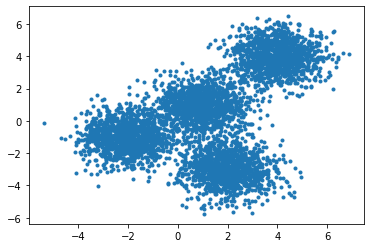

In [60]:
plt.scatter(X_data[:, 0], X_data[:, 1], marker='.')
plt.show()

###**Using K-Means to Cluster our Custom Dataset**
The KMeans class has many parameters that can be used, but we will be using these three:
<ul>
    <li> <b>init</b>: Initialization method of the centroids. </li>
    <ul>
        <li> Value will be: "k-means++" </li>
        <li> k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.</li>
    </ul>
    <li> <b>n_clusters</b>: The number of clusters to form as well as the number of centroids to generate. </li>
    <ul> <li> Value will be: 4 (since we have 4 centers)</li> </ul>
    <li> <b>n_init</b>: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia. </li>
    <ul> <li> Value will be: 12 </li> </ul>
</ul>

Initialize KMeans with these parameters, where the output parameter is called <b>k_means</b>.

In [61]:
from sklearn.cluster import KMeans

k_mean = KMeans(init='k-means++', n_clusters=4, n_init=12)
k_mean.fit(X_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [62]:
labels = k_mean.labels_
cluster_center = k_mean.cluster_centers_

###**Visualizing Cluster**

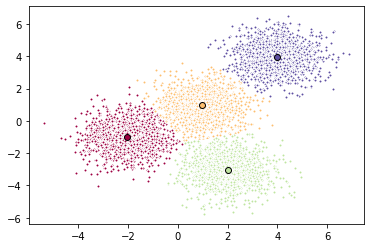

In [63]:
fig, ax = plt.subplots(figsize=(6,4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(labels))))

for index, col in zip(range(len(cluster_center)), colors):
  member_data = (labels == index)
  member_cluster_center = cluster_center[index]
  ax.plot(X_data[member_data, 0], X_data[member_data, 1], color='w', markerfacecolor=col, marker='.')
  ax.plot(member_cluster_center[0], member_cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

plt.show()

###**Let's Implement again with 3 Clusters**

In [64]:
k_mean = KMeans(init='k-means++', n_clusters=3, n_init=12)
k_mean.fit(X_data, y_data)
labels = k_mean.labels_
cluster_center = k_mean.cluster_centers_

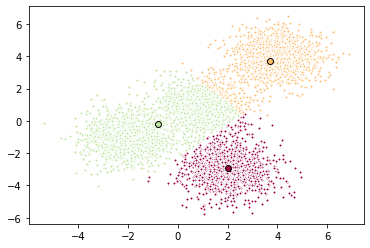

In [65]:
fig, ax = plt.subplots(figsize=(6,4))

for index, col in zip(range(len(cluster_center)), colors):
  members_data = (labels==index)
  member_cluster_center = cluster_center[index]
  ax.plot(X_data[members_data, 0], X_data[members_data, 1], 'w', markerfacecolor=col, marker='.')
  ax.plot(member_cluster_center[0], member_cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)

plt.show()

###_**Customer Segmentation using K-Means**_

###**Downloading the Dataset from IBM Object Storage**

In [ ]:
!wget -O Cust_Segmentation.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv

###**Reading & Exploring Data**

In [117]:
cust_df = pd.read_csv('Cust_Segmentation.csv')
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [118]:
df = cust_df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [137]:
from sklearn.preprocessing import StandardScaler

X_data = df.values[:,1:]
X_data = np.nan_to_num(X_data)
scaler = StandardScaler()
X_data_norm = scaler.fit(X_data).transform(X_data)
X_data

array([[41. ,  2. ,  6. , ...,  0. ,  6.3,  0. ],
       [47. ,  1. , 26. , ...,  0. , 12.8,  2. ],
       [33. ,  2. , 10. , ...,  1. , 20.9,  0. ],
       ...,
       [25. ,  4. ,  0. , ...,  1. , 33.4,  0. ],
       [32. ,  1. , 12. , ...,  0. ,  2.9,  0. ],
       [52. ,  1. , 16. , ...,  0. ,  8.6,  2. ]])

In [130]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X_data)
labels = k_means.labels_
print(labels)

[0 2 0 0 1 2 0 2 0 2 2 0 0 0 0 0 0 0 2 0 0 0 0 2 2 2 0 0 2 0 2 0 0 0 0 0 0
 0 0 2 0 2 0 1 0 2 0 0 0 2 2 0 0 2 2 0 0 0 2 0 2 0 2 2 0 0 2 0 0 0 2 2 2 0
 0 0 0 0 2 0 2 2 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 2 0 2 0
 0 0 0 0 0 0 2 0 2 2 0 2 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 2 0
 0 0 0 0 2 0 0 2 0 2 0 0 2 1 0 2 0 0 0 0 0 0 1 2 0 0 0 0 2 0 0 2 2 0 2 0 2
 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 2 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 2 0 2 0 2 2 0 0 0 0 0 0
 0 0 0 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 2 0 2 2 0
 0 0 0 0 2 0 0 0 0 0 0 2 0 0 2 0 0 2 0 0 0 0 0 2 0 0 0 1 0 0 0 2 0 2 2 2 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 2 0 0 2 0 0 0 0 2 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 1
 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 2 0 1 0 0 0 0 2 0 2 2 2 0 0 2 2 0 0 0 0 0 0
 0 2 0 0 0 0 2 0 0 0 2 0 

In [131]:
df['Clust_km'] = labels
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clust_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


In [132]:
df.groupby('Clust_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clust_km,,,,,,,,,
0,432.468413,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.285185,10.094761
1,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222
2,402.295082,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,0.171233,10.724590


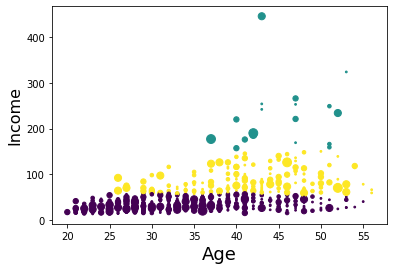

In [135]:
area = np.pi * (X_data[:,1])**2  
plt.scatter(X_data[:, 0], X_data[:, 3], s=area, c=labels.astype(np.float))
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

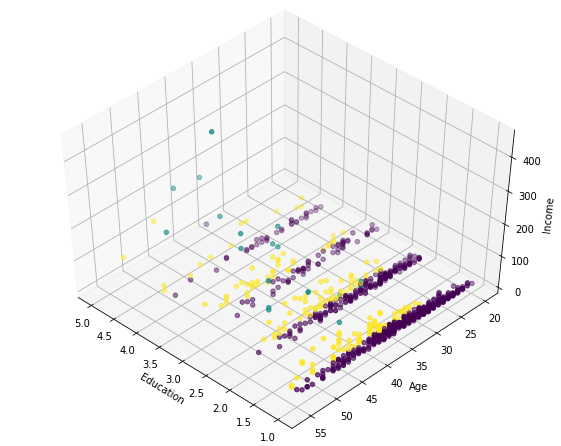

In [138]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X_data[:, 1], X_data[:, 0], X_data[:, 3], c= labels.astype(np.float))
plt.show()

##**<center>Thank You for Your Patience</center>**